# **NLP based Duplicate Bug Report Detection using Supervised Machine Learning Algorithms**

## **Introduction And Objective Of The Project**

Duplicate bug reports are a common problem in software development. They can waste time and resources, as developers may spend time investigating and resolving the same bug multiple times. This project aims to address this problem by using natural language processing (NLP) to classify duplicate bug reports.

NLP is a field of computer science that deals with the interaction between computers and human (natural) languages. It can be used to extract features from bug reports, such as the keywords and phrases used to describe the bug. These features can then be used to train a machine learning model to classify duplicate bug reports.

The project will use a variety of NLP techniques, such as tokenization, stop word removal, and stemming. These techniques will be used to clean and prepare the bug reports for machine learning. The machine learning model will then be trained on a dataset of known duplicate bug reports. Once the model is trained, it can be used to classify new bug reports as duplicate or non-duplicate.

The project has the potential to significantly improve the efficiency of the software development process. By automatically classifying duplicate bug reports, developers can focus their time and resources on resolving unique bugs. This will help to reduce the time to market for new software releases and improve the quality of the software.

## **Importing Libraries**

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP preprocessing and EDA
import re
import string
from collections import Counter
from wordcloud import WordCloud
import spacy
nlp = spacy.load('en_core_web_md')
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import normalize

# Feature Engineering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Set up nltk (Natural Language Toolkit)
nltk.download('stopwords', download_dir="C:/Users/Admin/miniconda3/envs/py310/nltk_data")
nltk.download('punkt', download_dir="C:/Users/Admin/miniconda3/envs/py310/nltk_data")
nltk.download('wordnet', download_dir="C:/Users/Admin/miniconda3/envs/py310/nltk_data")

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:/Users/Admin/miniconda3/envs/py310/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:/Users/Admin/miniconda3/envs/py310/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:/Users/Admin/miniconda3/envs/py310/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Loading Dataset**

In [2]:
df = pd.read_csv('mozilla_thunderbird.csv')
df.sample(10) # Displaying 10 random rows

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time
11283,342376,--,Address Book,286760.0,Trailing space in imported LDIF email address ...,User-Agent: Mozilla/5.0 (X11; U; Linux i...,VERIFIED,DUPLICATE,1.5,2006-06-21 22:31:17 -0700,2008-05-04 11:44:33 -0700
26488,593439,--,Message Compose Window,12916.0,Capability to Redirect E-mail Messages,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,DUPLICATE,unspecified,2010-09-03 12:09:18 -0700,2010-09-06 03:58:14 -0700
27268,618226,--,Folder and Message Lists,582505.0,Truncated message in inbox disappears on attem...,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,DUPLICATE,unspecified,2010-12-09 21:08:01 -0800,2011-03-09 08:17:00 -0800
11233,341630,--,General,NaN,Messages deleted during cleanup (IMAP) get dow...,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,INCOMPLETE,unspecified,2006-06-15 07:05:34 -0700,2009-01-14 08:32:18 -0800
14352,378715,--,Mail Window Front End,335310.0,message list in vertical view unusable,User-Agent: Mozilla/5.0 (X11; U; Linux i...,RESOLVED,DUPLICATE,2.0,2007-04-25 02:34:33 -0700,2007-04-25 04:30:35 -0700
30066,740316,--,Instant Messaging,NaN,Cannot delete chat accounts,User Agent: Mozilla/5.0 (X11; Linux x86_64) Ap...,RESOLVED,INVALID,14,2012-03-29 05:57:57 -0700,2013-01-25 10:35:59 -0800
11095,340080,--,General,NaN,TB is leaving eml-copies in c:\ probably due t...,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,FIXED,1.5,2006-06-02 02:07:01 -0700,2006-06-05 16:11:44 -0700
32478,938469,--,Theme,NaN,QFB buttons :active logic is incorrect,Currently on OS X one can press and hold down ...,RESOLVED,FIXED,Trunk,2013-11-13 19:43:06 -0800,2013-11-14 13:43:11 -0800
7769,302246,--,General,NaN,option to check mail every x minutes ignored a...,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,WORKSFORME,unspecified,2005-07-26 14:14:55 -0700,2005-10-06 14:19:12 -0700
15388,392507,--,Mail Window Front End,NaN,Printing e-mail attachments containing attachm...,User-Agent: Mozilla/4.0 (compatible; MSI...,RESOLVED,INCOMPLETE,unspecified,2007-08-16 14:29:33 -0700,2009-03-12 06:10:49 -0700


## **Exploratory Data Analysis (EDA)**

### **Size Of Dataset**

In [3]:
print("Total number of rows in dataset:", df.shape[0])
print("Total number of columns in dataset:", df.shape[1])

Total number of rows in dataset: 32551
Total number of columns in dataset: 11


### **Dataset Information**

In [4]:
df.info() # Getting the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32551 entries, 0 to 32550
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Issue_id          32551 non-null  int64  
 1   Priority          32551 non-null  object 
 2   Component         32551 non-null  object 
 3   Duplicated_issue  12501 non-null  float64
 4   Title             32551 non-null  object 
 5   Description       32501 non-null  object 
 6   Status            32551 non-null  object 
 7   Resolution        32551 non-null  object 
 8   Version           32551 non-null  object 
 9   Created_time      32551 non-null  object 
 10  Resolved_time     32551 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.7+ MB


### **Basic Stats**

In [5]:
df.describe(include='all') # describe the data, including categorical data

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time
count,32551.000000,32551,32551,12501.000000,32551,32501,32551,32551,32551,32551,32551
unique,NaN,6,23,NaN,32273,32304,2,7,33,32545,30374
top,NaN,--,General,NaN,crash if I close the mail window while checkin...,,RESOLVED,DUPLICATE,unspecified,2004-11-05 14:33:19 -0800,2011-06-09 14:58:45 -0700
freq,NaN,32237,9633,NaN,6,16,30278,12501,19560,2,17
mean,447567.353138,NaN,NaN,337756.457163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,169923.289989,NaN,NaN,185447.236277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,35689.000000,NaN,NaN,2654.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,306819.500000,NaN,NaN,218999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,407940.000000,NaN,NaN,304045.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,545980.500000,NaN,NaN,466025.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Finding Missing Values**

In [6]:
# Finding missing values in the dataset
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 2) # the percentage Of missing values
missing_df = pd.concat([missing_count, missing_percentage], axis=1, keys=['Total Missing Values', 'Missing Values Percentage'])
print (missing_df)

                  Total Missing Values  Missing Values Percentage
Issue_id                             0                       0.00
Priority                             0                       0.00
Component                            0                       0.00
Duplicated_issue                 20050                      61.60
Title                                0                       0.00
Description                         50                       0.15
Status                               0                       0.00
Resolution                           0                       0.00
Version                              0                       0.00
Created_time                         0                       0.00
Resolved_time                        0                       0.00


### **Handling Missing Values**

- The column **"Duplicated_issue"** only contain value (i.e. Issue_id) if the issue is a duplicate issue. Otherwise it contains **"NaN"**, so missing values in this column is not an issue. That's why I am **replacing NaN values with 0 and non-NaN values with 1.**
- For **"Description"** column, since the dataset I am using is big (32551 rows), **removing the 50 missing values wouldn't cause any harm.** That's why I am going to **remove the 50 rows of null values.**

In [7]:
# replacing nan values with 0 and non-nan values with 1 in the column 'Duplicated_issue'
df['Duplicated_issue'] = df['Duplicated_issue'].apply(lambda x: 0 if pd.isna(x) else 1)
df.sample(10)

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time
20388,488443,--,Message Compose Window,0,Support multiple command line arguments for re...,User-Agent: Mozilla/5.0 (X11; U; Linux i...,RESOLVED,WORKSFORME,unspecified,2009-04-15 01:48:42 -0700,2009-12-04 10:29:01 -0800
22553,522889,--,General,1,IMAP Inbox File Never Stops Growing,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,DUPLICATE,unspecified,2009-10-17 09:48:51 -0700,2010-10-18 04:05:23 -0700
26362,589118,--,Mail Window Front End,1,Go Next Unread Message doesnt work across fold...,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,DUPLICATE,Trunk,2010-08-20 03:16:35 -0700,2010-08-20 04:38:03 -0700
29815,731561,--,Folder and Message Lists,0,Morphing e-mails,User Agent: Mozilla/5.0 (Windows NT 6.1; WOW64...,RESOLVED,INVALID,10,2012-02-29 05:51:12 -0800,2012-02-29 07:55:48 -0800
28054,655188,--,Folder and Message Lists,1,Auto Expand Threads in Open Windows/Tabs,User-Agent: Mozilla/5.0 (Windows NT 6.1;...,RESOLVED,DUPLICATE,unspecified,2011-05-05 18:32:15 -0700,2011-05-09 00:11:21 -0700
4023,267111,P2,Mail Window Front End,0,new/rename folder dialog doesnt respond to Ent...,found using 2004103005-0.9 on linux fc2 --coul...,VERIFIED,WORKSFORME,unspecified,2004-10-31 22:31:07 -0800,2010-06-27 09:51:26 -0700
13450,369283,--,General,0,Thunderbird should support the Vista Search,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,FIXED,unspecified,2007-02-04 11:17:31 -0800,2008-10-07 06:16:37 -0700
15488,393138,--,General,0,cant use themes,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,INVALID,unspecified,2007-08-21 20:54:58 -0700,2007-09-16 06:59:27 -0700
22660,524852,--,Mail Window Front End,0,drag and drop message to local file system: fi...,Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US...,VERIFIED,FIXED,Trunk,2009-10-27 17:31:53 -0700,2010-01-14 06:59:53 -0800
2783,253234,--,Mail Window Front End,0,[patch]No Option to set Junk Mail as Read,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,FIXED,unspecified,2004-07-27 01:44:43 -0700,2006-08-02 11:27:48 -0700


In [8]:
# Checking for missing values, only 50 missing values should be left in 'Description' column
df.isnull().sum()

Issue_id             0
Priority             0
Component            0
Duplicated_issue     0
Title                0
Description         50
Status               0
Resolution           0
Version              0
Created_time         0
Resolved_time        0
dtype: int64

In [9]:
# Removing Null Values
df_NullRemoved = df.dropna(subset=['Description'])
df_NullRemoved.isnull().sum()

Issue_id            0
Priority            0
Component           0
Duplicated_issue    0
Title               0
Description         0
Status              0
Resolution          0
Version             0
Created_time        0
Resolved_time       0
dtype: int64

In [10]:
# Checking shape of dataset after removing null values
print("After removing null values:\nRemaining rows in dataset:", df_NullRemoved.shape[0])
print("Remaining columns in dataset:", df_NullRemoved.shape[1])

After removing null values:
Remaining rows in dataset: 32501
Remaining columns in dataset: 11


### **Priority Levels Distribuition**

In [11]:
print(df_NullRemoved['Priority'].value_counts().head(10))

Priority
--    32192
P1      102
P3       89
P2       81
P4       21
P5       16
Name: count, dtype: int64


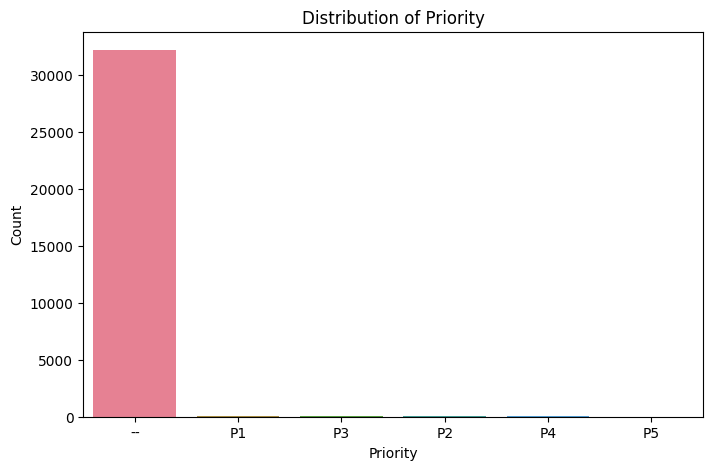

In [12]:
# Distribution of 'Priority' with count
plt.figure(figsize=(8, 5))
sns.countplot(x='Priority', data=df_NullRemoved, order= df_NullRemoved['Priority'].value_counts().index, palette='husl')
plt.title('Distribution of Priority')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

### **Distribution Of Different Components**

In [13]:
group = df_NullRemoved.groupby('Component')['Issue_id'].count()
print(group)

Component
Account Manager             1377
Address Book                1291
Build Config                 664
Disability Access             17
FileLink                      36
Filters                       22
Folder and Message Lists    1699
General                     9622
Help Documentation            85
Installer                    518
Instant Messaging            231
Mail Window Front End       7844
Message Compose Window      3790
Message Reader UI            881
Migration                    386
OS Integration               249
Preferences                 1303
Search                       509
Security                     572
Testing Infrastructure       150
Theme                        312
Toolbars and Tabs            451
Untriaged                    492
Name: Issue_id, dtype: int64


Text(0, 0.5, 'Component')

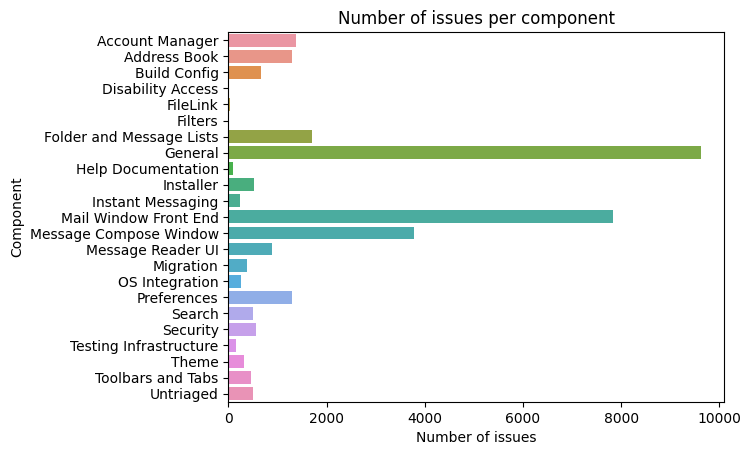

In [14]:
# Groupby and analyze components categories
group = df_NullRemoved.groupby('Component')['Issue_id'].count()
sns.barplot(y=group.index, x=group.values)
plt.title('Number of issues per component')
plt.xlabel('Number of issues')
plt.ylabel('Component')

### **Bug Status Distribution**

In [15]:
df_NullRemoved['Status'].value_counts()

Status
RESOLVED    30234
VERIFIED     2267
Name: count, dtype: int64

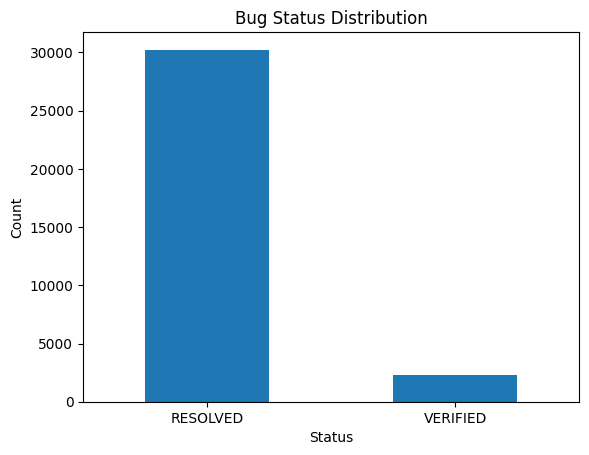

In [16]:
# Bug Status Distribution Plot
plt.figure()
df_NullRemoved['Status'].value_counts().plot(kind='bar')
sns.set_palette('pastel')
plt.title('Bug Status Distribution')
plt.xlabel('Status')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

### **Distribution Of Resolution**

In [17]:
df_NullRemoved['Resolution'].value_counts()

Resolution
DUPLICATE     12499
FIXED          5673
WORKSFORME     4915
INCOMPLETE     3728
INVALID        3549
EXPIRED        1407
WONTFIX         730
Name: count, dtype: int64

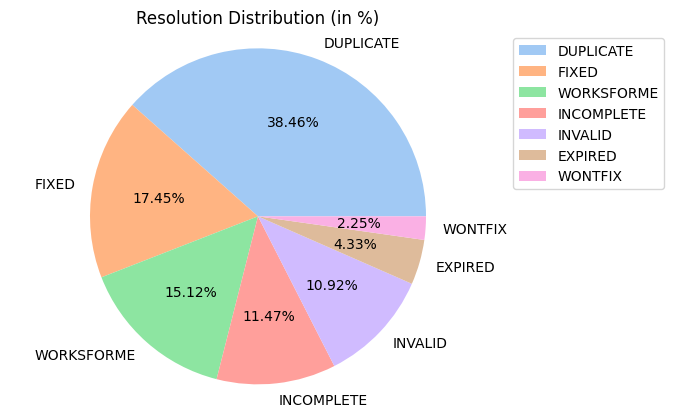

In [18]:
# Resolution Distribution Pie Chart
values = df_NullRemoved['Resolution'].value_counts(normalize=True) * 100
plt.pie(values, labels=values.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Resolution Distribution (in %)')
plt.legend(bbox_to_anchor=(1, 1))
sns.set_palette("pastel")
plt.show()

### **Distribution Of Errors In Different Versions**

In [19]:
df_NullRemoved['Version'].value_counts().sort_index()

Version
0.9               38
1.0              539
1.5              925
10               187
11               172
12               179
13               175
14               119
15               189
16               123
17               498
18                12
19                20
2.0             2073
20                 5
21                14
22                22
23                12
24               166
25                12
26                 7
27                 3
28                 3
29                 2
3.0             1066
3.1              439
5.0              255
6                134
7                173
8                158
9                132
Trunk           5107
unspecified    19542
Name: count, dtype: int64

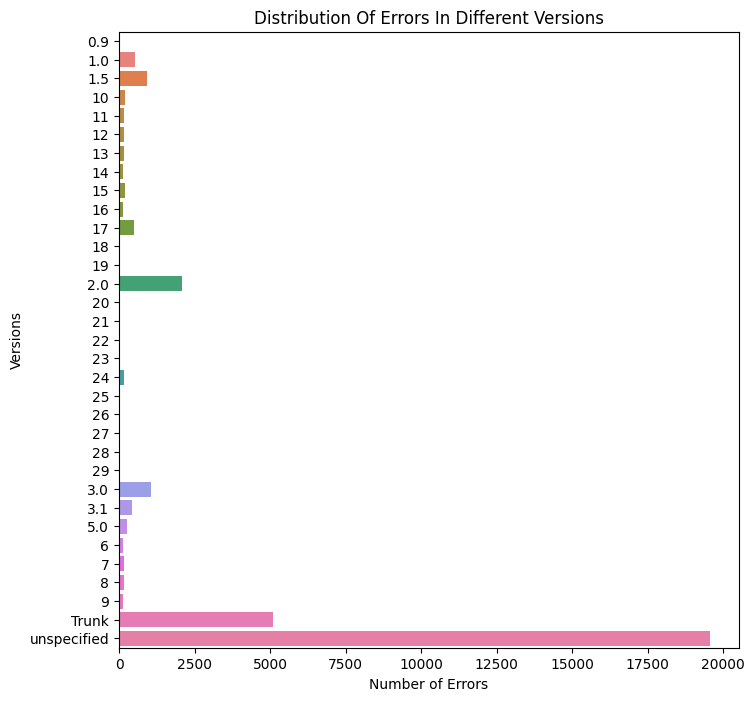

In [20]:
version = df_NullRemoved['Version'].value_counts().sort_index()
plt.figure(figsize=(8,8))
sns.barplot(y=version.index, x=version.values, palette="husl")
plt.title('Distribution Of Errors In Different Versions')
plt.xlabel('Number of Errors')
plt.ylabel('Versions')
plt.show()

### **Duplicated Issues Distribution**

In [21]:
# Explore the distribution of duplicated issues
print(df_NullRemoved['Duplicated_issue'].value_counts())

Duplicated_issue
0    20002
1    12499
Name: count, dtype: int64


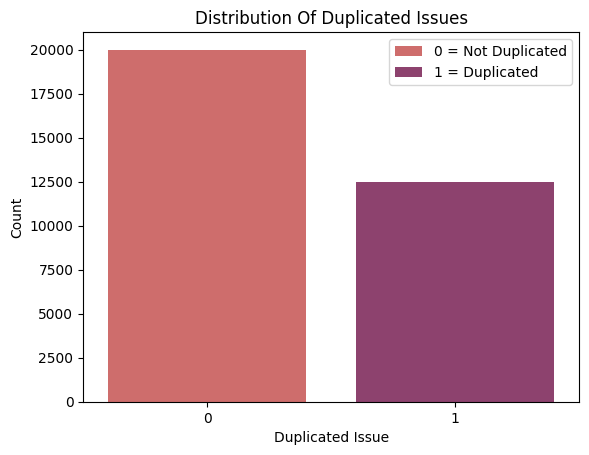

In [22]:
# Distribution of 'Duplicated_issue' (target variable)
sns.countplot(data=df_NullRemoved, x='Duplicated_issue', hue='Duplicated_issue', palette="flare", dodge=False)
plt.title('Distribution Of Duplicated Issues')
plt.xlabel('Duplicated Issue')
plt.ylabel('Count')
plt.legend(['0 = Not Duplicated', '1 = Duplicated'])
plt.show()

As we can see that the dataset I am working on has class imbalance problem. It has **20002** bug reports that are **not duplicates**, and **12499** reports that are **duplicates**.
- It means that **0** is the **majority class** (non-duplicate) with approximately 7500 more reports than **minority class 1** (duplicate).
- It can cause many issues including:
  - **Accuracy paradox:** models may achieve high overall accuracy but poor performance on the minority class.
  - **Bias towards the majority class:** models will focus on minimizing errors on majority samples.
  - **Overfitting:** high variance models may overfit to the predominant patterns of the majority class.
  - **Under-representation of the minority class:** important insights from small classes may be overlooked.
- Therefore it is necessary that I must deal with this imbalanced class issue.
- **I'll randomly remove samples from the non-duplicate majority class (0) to reduce its size and make it equal to the minority class (1).**

#### **Balancing The Dataset**

Duplicated_issue
1    12499
0    12499
Name: count, dtype: int64


Text(0.5, 1.0, 'After (Balanced Classes)')

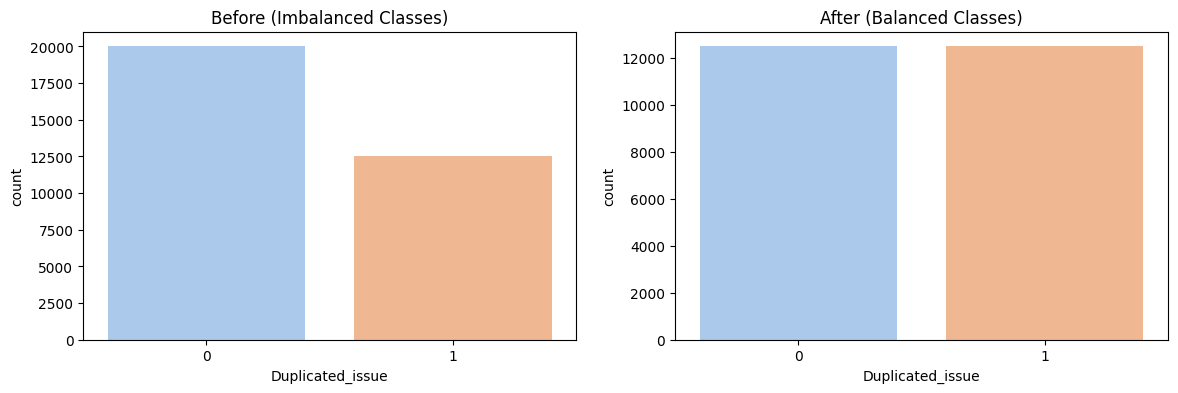

In [23]:
# Get indices of duplicate (1) and non-duplicate (0) classes
duplicate_inds = df_NullRemoved[df_NullRemoved['Duplicated_issue'] == 1].index
non_duplicate_inds = df_NullRemoved[df_NullRemoved['Duplicated_issue'] == 0].index

# Downsample majority class (non-duplicate)
downsample_ratio = len(duplicate_inds) / len(non_duplicate_inds) # ratio of duplicate to non-duplicate
downsampled_inds = np.random.choice(non_duplicate_inds, size=int(len(non_duplicate_inds)*downsample_ratio)) # random sample from non_duplicate_inds without replacement

# Combine minority and downsampled majority indices
balanced_inds = np.concatenate([duplicate_inds, downsampled_inds]) # concatenate both indices

# Subset dataframe with balanced indices
df_balanced = df_NullRemoved.loc[balanced_inds]

print(df_balanced['Duplicated_issue'].value_counts())

# Compare plot before and after balancing
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.countplot(x='Duplicated_issue', data=df_NullRemoved, ax=ax[0])
ax[0].set_title('Before (Imbalanced Classes)')
sns.countplot(x='Duplicated_issue', data=df_balanced, ax=ax[1])
ax[1].set_title('After (Balanced Classes)')

## **Preprocessing Dataset**

### **Analyzing Dataset For Unnecessary Data**

In [24]:
df_balanced.sample(10)

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time
19707,476159,--,Folder and Message Lists,0,Select All when viewing unread messages can se...,User-Agent: Mozilla/5.0 (X11; U; Linux i...,RESOLVED,INCOMPLETE,2.0,2009-01-30 07:06:13 -0800,2010-10-21 06:01:13 -0700
8205,307810,--,Preferences,1,Character encodings dropdown boxes only work w...,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,DUPLICATE,1.5,2005-09-09 16:22:40 -0700,2006-01-12 09:27:31 -0800
16381,410607,--,Message Compose Window,0,lack of ability to change font colors for e-ma...,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,INVALID,unspecified,2008-01-03 00:34:25 -0800,2008-01-03 10:07:52 -0800
6261,286282,--,Mail Window Front End,0,Thunderbird should use mozilla\toolkits alert ...,we currently use the version in xpfe.; ; I als...,RESOLVED,FIXED,Trunk,2005-03-15 11:28:54 -0800,2005-03-16 10:22:03 -0800
29428,714621,--,Message Compose Window,1,HTML/Rich text (copied from IE; Firefox; MSWor...,User Agent: Mozilla/5.0 (Windows NT 5.1) Apple...,RESOLVED,DUPLICATE,9,2012-01-02 06:36:30 -0800,2012-01-18 00:55:54 -0800
11561,346040,--,Message Compose Window,0,Text copied from other emails bracketed by ast...,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,INVALID,unspecified,2006-07-26 19:27:13 -0700,2007-02-20 10:32:44 -0800
879,227788,--,Mail Window Front End,0,Chose view unread; marked junk; opened view pi...,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,WORKSFORME,unspecified,2003-12-07 21:26:25 -0800,2004-10-10 06:46:39 -0700
28040,654768,--,Installer,0,clamav on windows says it contains W32.Dropper,User-Agent: Mozilla/5.0 (Windows NT 5.1;...,RESOLVED,WONTFIX,3.1,2011-05-04 11:02:15 -0700,2012-02-20 01:40:22 -0800
7648,300836,--,General,1,Add a pref for same host names which can bypas...,We should allow enterprise customers to set a ...,RESOLVED,DUPLICATE,Trunk,2005-07-14 14:59:16 -0700,2005-07-14 15:05:17 -0700
25807,573482,--,Message Compose Window,0,Thunderbird should remember passwords for the ...,User-Agent: Mozilla/5.0 (X11; U; Linux i...,RESOLVED,INCOMPLETE,unspecified,2010-06-21 08:23:46 -0700,2012-05-03 10:50:16 -0700


#### **My Analysis:**

I think the key columns for identifying duplicate bug reports are 'Title', 'Description' and 'Duplicated_issue'. The **'Title' and 'Description'** provide the text details needed to match duplicate content. **'Duplicated_issue'** is the target label indicating if a bug is a duplicate.

In my opinion, columns like 'Issue_id', 'Priority', 'Status' etc are just metadata about the bug tracking process. They don't help in identifying duplicates. **I can drop these irrelevant columns when preprocessing the data.**

Keeping just 'Title', 'Description' and 'Duplicated_issue' provides me the optimal set of features and labels needed for my classifier. Removing the unnecessary columns will help avoid overfitting and improve model performance. I believe preprocessing the data this way will be beneficial for training machine learning models to detect duplicate bug reports.

In [25]:
# Creating new dataset containing 'Title', 'Description' and 'Duplicated_issue' columns
df_new = df_balanced[['Title', 'Description', 'Duplicated_issue']]
df_new.sample(5)

,Title,Description,Duplicated_issue
9736,sent email is empty except subject (IMAP/exter...,User-Agent: Mozilla/5.0 (Windows; U; Win...,0
7870,when renaming a folder; changing a captial let...,User-Agent: Mozilla/5.0 (X11; U; Linux i...,1
9089,save dialog remembers previous attachment file...,User-Agent: Mozilla/5.0 (Windows; U; Win...,0
803,Cannot move (drag) attached mail (message/rfc8...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1
23726,When scrolling down the tools menu all the lis...,User-Agent: Mozilla/5.0 (Windows; U; Win...,0


### **Building Corpus**

In [26]:
# Building the corpus from the lemmatized tokens
df_new['corpus'] = df_new['Title'] + ' ' + df_new['Description']
df_new.head()

,Title,Description,Duplicated_issue,corpus
18,Easier way to file sent mail,Summary: Allow a user to address an email to a...,1,Easier way to file sent mail Summary: Allow a ...
23,Filter on multiple instances of Received header,User-Agent: Mozilla/5.0 (X11; U; Linux i...,1,Filter on multiple instances of Received heade...
39,sent mail box screen shakes up and down. Even...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,sent mail box screen shakes up and down. Even...
43,Leave messages on server for X days,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Leave messages on server for X days User-Agent...
47,Mail window shakes when one email is in a map;...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Mail window shakes when one email is in a map;...


#### **Removing Digits And Punctuations From Corpus**

In [27]:
# Removing the punctuation 
df_new['cleaned_corpus'] = df_new['corpus'].str.translate(str.maketrans('', '', string.punctuation))
# Removing numbers and symbols
df_new['cleaned_corpus'] = df_new['cleaned_corpus'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', ' ', x))
# Consolidating the whitespaces into a single space
df_new['cleaned_corpus'] = df_new['cleaned_corpus'].apply(lambda x: re.sub(r'\s+', ' ', x))
df_new.head(5)

,Title,Description,Duplicated_issue,corpus,cleaned_corpus
18,Easier way to file sent mail,Summary: Allow a user to address an email to a...,1,Easier way to file sent mail Summary: Allow a ...,Easier way to file sent mail Summary Allow a u...
23,Filter on multiple instances of Received header,User-Agent: Mozilla/5.0 (X11; U; Linux i...,1,Filter on multiple instances of Received heade...,Filter on multiple instances of Received heade...
39,sent mail box screen shakes up and down. Even...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,sent mail box screen shakes up and down. Even...,sent mail box screen shakes up and down Even w...
43,Leave messages on server for X days,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Leave messages on server for X days User-Agent...,Leave messages on server for X days UserAgent ...
47,Mail window shakes when one email is in a map;...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Mail window shakes when one email is in a map;...,Mail window shakes when one email is in a map ...


### **Finding Most Common Words**

In [28]:
word_counts = Counter(df_new['cleaned_corpus'].str.cat(sep=' ').split())
common_words = word_counts.most_common(15)
print("Most common words are as follows:")
common_words

Most common words are as follows:


[('the', 146125),
 ('to', 105046),
 ('a', 62251),
 ('in', 51558),
 ('and', 49930),
 ('I', 49239),
 ('is', 44090),
 ('Windows', 37842),
 ('of', 35945),
 ('Mozilla', 30613),
 ('it', 30339),
 ('message', 29949),
 ('Thunderbird', 27422),
 ('Gecko', 26005),
 ('not', 25263)]

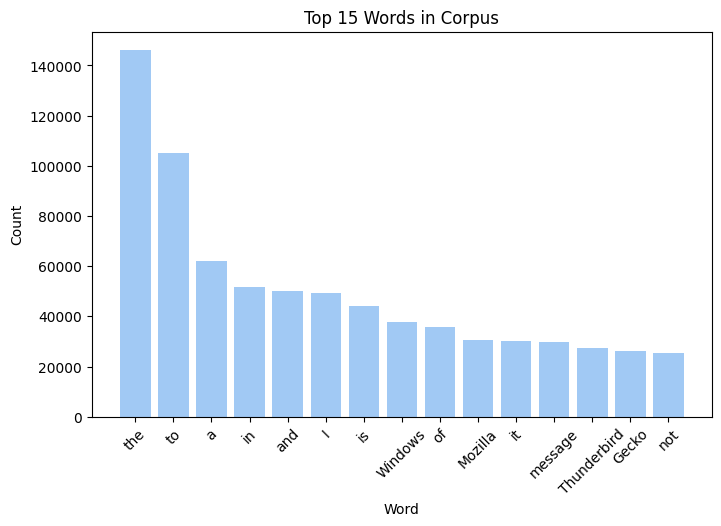

In [29]:
x, y = zip(*common_words) # Unpack tuples
plt.figure(figsize=(8, 5))
plt.bar(x, y)
sns.set_palette('flare')
plt.xticks(rotation=45) 
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 15 Words in Corpus')
plt.show()

### **Generating Word Cloud**

Bigger the word, more frequent it is used in the dataset.


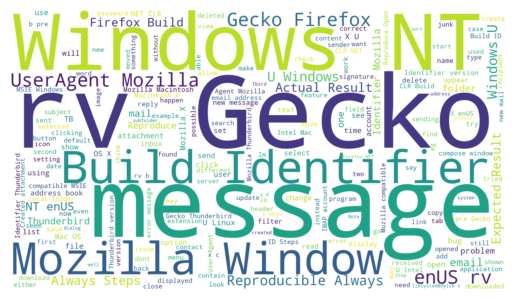

In [30]:
print("Bigger the word, more frequent it is used in the dataset.")
wc = WordCloud(height=1080, width=1920, background_color="white", random_state=300,).generate(df_new['cleaned_corpus'].str.cat(sep=' '))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### **Tokenization: Segmenting text into individual words/tokens.**

Example: "This is a sentence." -> ["This", "is", "a", "sentence"]

In [31]:
# Performing NLP on the cleaned_corpus column using SpaCy
corpus_docs = list(nlp.pipe(df_new['cleaned_corpus'], n_process=-1)) # n_process=-1 uses all available cores

In [32]:
# Performing Tokenization
df_new['corpus_docs'] = [[token.text for token in doc] for doc in corpus_docs]
df_new.head()

,Title,Description,Duplicated_issue,corpus,cleaned_corpus,corpus_docs
18,Easier way to file sent mail,Summary: Allow a user to address an email to a...,1,Easier way to file sent mail Summary: Allow a ...,Easier way to file sent mail Summary Allow a u...,"[Easier, way, to, file, sent, mail, Summary, A..."
23,Filter on multiple instances of Received header,User-Agent: Mozilla/5.0 (X11; U; Linux i...,1,Filter on multiple instances of Received heade...,Filter on multiple instances of Received heade...,"[Filter, on, multiple, instances, of, Received..."
39,sent mail box screen shakes up and down. Even...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,sent mail box screen shakes up and down. Even...,sent mail box screen shakes up and down Even w...,"[sent, mail, box, screen, shakes, up, and, dow..."
43,Leave messages on server for X days,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Leave messages on server for X days User-Agent...,Leave messages on server for X days UserAgent ...,"[Leave, messages, on, server, for, X, days, Us..."
47,Mail window shakes when one email is in a map;...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Mail window shakes when one email is in a map;...,Mail window shakes when one email is in a map ...,"[Mail, window, shakes, when, one, email, is, i..."


### **Tagging Part-of-speech**

In [33]:
pos_counts = Counter()
for doc in corpus_docs:
    pos_counts.update([token.pos_ for token in doc])

pos_dict = {'SPACE': 'whitespace tokens', 'NOUN': 'nouns', 'PROPN': 'proper nouns', 'VERB': 'verbs', 'ADJ': 'adjectives', 'NUM': 'numeric tokens', 'ADV': 'adverbs', 'PART': 'particles', 'AUX': 'auxiliary verbs', 'ADP': 'adpositions', 'X': 'unknown tokens', 'PRON': 'pronouns', 'PUNCT': 'punctuation marks', 'SCONJ': 'subordinating conjunctions', 'INTJ': 'interjections', 'CCONJ': 'coordinating conjunctions', 'SYM': 'symbols', 'DET': 'determiners'}

for key, value in pos_dict.items():
    print(f"Total number of {value} in corpus is: {pos_counts[key]}")

Total number of whitespace tokens in corpus is: 156
Total number of nouns in corpus is: 764197
Total number of proper nouns in corpus is: 642760
Total number of verbs in corpus is: 499271
Total number of adjectives in corpus is: 200151
Total number of numeric tokens in corpus is: 12632
Total number of adverbs in corpus is: 137913
Total number of particles in corpus is: 118164
Total number of auxiliary verbs in corpus is: 178440
Total number of adpositions in corpus is: 304367
Total number of unknown tokens in corpus is: 22160
Total number of pronouns in corpus is: 205950
Total number of punctuation marks in corpus is: 11155
Total number of subordinating conjunctions in corpus is: 81655
Total number of interjections in corpus is: 8970
Total number of coordinating conjunctions in corpus is: 84524
Total number of symbols in corpus is: 2099
Total number of determiners in corpus is: 290972


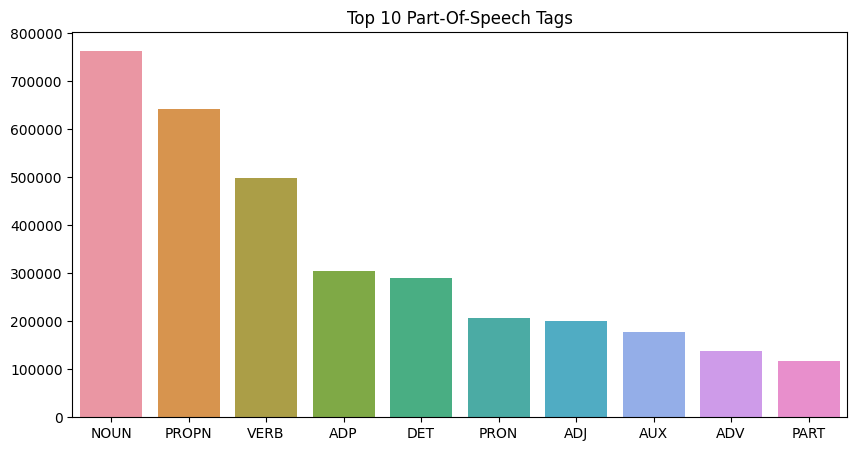

In [34]:
# plotting the part-of-speech tags
plt.figure(figsize=(10, 5))
plt.title("Top 10 Part-Of-Speech Tags")
sns.barplot(x=[x[0] for x in pos_counts.most_common(10)],
y=[x[1] for x in pos_counts.most_common(10)])
plt.show()

### **Named Entities**

In [35]:
ner_counts = Counter()
for doc in corpus_docs:
    ner_counts.update([token.ent_type_ for token in doc])
print(f"The total number of organizations identified in corpus is: {ner_counts['ORG']}")
print(f"The total number of persons identified in corpus is: {ner_counts['PERSON']}") 
print(f"The total number of locations identified in corpus is: {ner_counts['GPE']}")
print(f"The total number of dates identified in corpus is: {ner_counts['DATE']}")
print(f"The total number of products identified in corpus is: {ner_counts['PRODUCT']}")

The total number of organizations identified in corpus is: 177699
The total number of persons identified in corpus is: 55853
The total number of locations identified in corpus is: 5711
The total number of dates identified in corpus is: 9494
The total number of products identified in corpus is: 65880


### **Stop Words Removal: Removing common words that don't add semantic value.**

Example: ["the", "a", "dog", "is", "ran"] -> ["dog", "ran"]

In [36]:
stop_words = set(stopwords.words('english'))
df_new['corpus_docs'] = [[token.text for token in doc if token.text not in stop_words] for doc in corpus_docs]
df_new.head()

,Title,Description,Duplicated_issue,corpus,cleaned_corpus,corpus_docs
18,Easier way to file sent mail,Summary: Allow a user to address an email to a...,1,Easier way to file sent mail Summary: Allow a ...,Easier way to file sent mail Summary Allow a u...,"[Easier, way, file, sent, mail, Summary, Allow..."
23,Filter on multiple instances of Received header,User-Agent: Mozilla/5.0 (X11; U; Linux i...,1,Filter on multiple instances of Received heade...,Filter on multiple instances of Received heade...,"[Filter, multiple, instances, Received, header..."
39,sent mail box screen shakes up and down. Even...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,sent mail box screen shakes up and down. Even...,sent mail box screen shakes up and down Even w...,"[sent, mail, box, screen, shakes, Even, changi..."
43,Leave messages on server for X days,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Leave messages on server for X days User-Agent...,Leave messages on server for X days UserAgent ...,"[Leave, messages, server, X, days, UserAgent, ..."
47,Mail window shakes when one email is in a map;...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Mail window shakes when one email is in a map;...,Mail window shakes when one email is in a map ...,"[Mail, window, shakes, one, email, map, window..."


### **Stemming: Reducing words to their root form by stripping suffixes.**

Example: "running" -> "run", "apples" -> "apple", "eating" -> "eat"

In [37]:
stemmer = PorterStemmer() # The most used stemmer: NLTK's PorterStemmer
df_stemmed = df_new.copy() # making a copy of the dataframe
df_stemmed['corpus_docs'] = df_new['corpus_docs'].apply(lambda x: [stemmer.stem(w) for w in x])
df_stemmed.head()

,Title,Description,Duplicated_issue,corpus,cleaned_corpus,corpus_docs
18,Easier way to file sent mail,Summary: Allow a user to address an email to a...,1,Easier way to file sent mail Summary: Allow a ...,Easier way to file sent mail Summary Allow a u...,"[easier, way, file, sent, mail, summari, allow..."
23,Filter on multiple instances of Received header,User-Agent: Mozilla/5.0 (X11; U; Linux i...,1,Filter on multiple instances of Received heade...,Filter on multiple instances of Received heade...,"[filter, multipl, instanc, receiv, header, use..."
39,sent mail box screen shakes up and down. Even...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,sent mail box screen shakes up and down. Even...,sent mail box screen shakes up and down Even w...,"[sent, mail, box, screen, shake, even, chang, ..."
43,Leave messages on server for X days,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Leave messages on server for X days User-Agent...,Leave messages on server for X days UserAgent ...,"[leav, messag, server, x, day, userag, mozilla..."
47,Mail window shakes when one email is in a map;...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Mail window shakes when one email is in a map;...,Mail window shakes when one email is in a map ...,"[mail, window, shake, one, email, map, window,..."


In [38]:
# converting list to string
df_stemmed['corpus_docs'] = df_stemmed['corpus_docs'].apply(lambda x: ' '.join(x))
df_stemmed.head()

,Title,Description,Duplicated_issue,corpus,cleaned_corpus,corpus_docs
18,Easier way to file sent mail,Summary: Allow a user to address an email to a...,1,Easier way to file sent mail Summary: Allow a ...,Easier way to file sent mail Summary Allow a u...,easier way file sent mail summari allow user a...
23,Filter on multiple instances of Received header,User-Agent: Mozilla/5.0 (X11; U; Linux i...,1,Filter on multiple instances of Received heade...,Filter on multiple instances of Received heade...,filter multipl instanc receiv header userag mo...
39,sent mail box screen shakes up and down. Even...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,sent mail box screen shakes up and down. Even...,sent mail box screen shakes up and down Even w...,sent mail box screen shake even chang messag u...
43,Leave messages on server for X days,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Leave messages on server for X days User-Agent...,Leave messages on server for X days UserAgent ...,leav messag server x day userag mozilla window...
47,Mail window shakes when one email is in a map;...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Mail window shakes when one email is in a map;...,Mail window shakes when one email is in a map ...,mail window shake one email map window smaller...


### **Lemmatization: Reducing words to root form based on vocabulary and context**

Example: "better" -> "good", "ate" -> "eat", "mice" -> "mouse"

In [39]:
df_lemmatized = df_new.copy()
df_lemmatized['corpus_docs'] = [[token.lemma_ for token in doc] for doc in corpus_docs]
df_lemmatized.head()

,Title,Description,Duplicated_issue,corpus,cleaned_corpus,corpus_docs
18,Easier way to file sent mail,Summary: Allow a user to address an email to a...,1,Easier way to file sent mail Summary: Allow a ...,Easier way to file sent mail Summary Allow a u...,"[easy, way, to, file, send, mail, Summary, all..."
23,Filter on multiple instances of Received header,User-Agent: Mozilla/5.0 (X11; U; Linux i...,1,Filter on multiple instances of Received heade...,Filter on multiple instances of Received heade...,"[filter, on, multiple, instance, of, received,..."
39,sent mail box screen shakes up and down. Even...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,sent mail box screen shakes up and down. Even...,sent mail box screen shakes up and down Even w...,"[send, mail, box, screen, shake, up, and, down..."
43,Leave messages on server for X days,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Leave messages on server for X days User-Agent...,Leave messages on server for X days UserAgent ...,"[leave, message, on, server, for, x, day, User..."
47,Mail window shakes when one email is in a map;...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Mail window shakes when one email is in a map;...,Mail window shakes when one email is in a map ...,"[Mail, window, shake, when, one, email, be, in..."


### **Lower Casing: Converting all words to lower case form.** 

Example: "The Dog Ran" -> "the dog ran"

In [40]:
# Converting all words to lower case form in columns: Title_tokens, Desc_tokens
df_lemmatized['corpus_docs'] = df_lemmatized['corpus_docs'].apply(lambda x: [word.lower() for word in x])
df_lemmatized.head()

,Title,Description,Duplicated_issue,corpus,cleaned_corpus,corpus_docs
18,Easier way to file sent mail,Summary: Allow a user to address an email to a...,1,Easier way to file sent mail Summary: Allow a ...,Easier way to file sent mail Summary Allow a u...,"[easy, way, to, file, send, mail, summary, all..."
23,Filter on multiple instances of Received header,User-Agent: Mozilla/5.0 (X11; U; Linux i...,1,Filter on multiple instances of Received heade...,Filter on multiple instances of Received heade...,"[filter, on, multiple, instance, of, received,..."
39,sent mail box screen shakes up and down. Even...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,sent mail box screen shakes up and down. Even...,sent mail box screen shakes up and down Even w...,"[send, mail, box, screen, shake, up, and, down..."
43,Leave messages on server for X days,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Leave messages on server for X days User-Agent...,Leave messages on server for X days UserAgent ...,"[leave, message, on, server, for, x, day, user..."
47,Mail window shakes when one email is in a map;...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Mail window shakes when one email is in a map;...,Mail window shakes when one email is in a map ...,"[mail, window, shake, when, one, email, be, in..."


In [41]:
# converting list to string
df_lemmatized['corpus_docs'] = df_lemmatized['corpus_docs'].apply(lambda x: ' '.join(x))
df_lemmatized.head()

,Title,Description,Duplicated_issue,corpus,cleaned_corpus,corpus_docs
18,Easier way to file sent mail,Summary: Allow a user to address an email to a...,1,Easier way to file sent mail Summary: Allow a ...,Easier way to file sent mail Summary Allow a u...,easy way to file send mail summary allow a use...
23,Filter on multiple instances of Received header,User-Agent: Mozilla/5.0 (X11; U; Linux i...,1,Filter on multiple instances of Received heade...,Filter on multiple instances of Received heade...,filter on multiple instance of received header...
39,sent mail box screen shakes up and down. Even...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,sent mail box screen shakes up and down. Even...,sent mail box screen shakes up and down Even w...,send mail box screen shake up and down even wh...
43,Leave messages on server for X days,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Leave messages on server for X days User-Agent...,Leave messages on server for X days UserAgent ...,leave message on server for x day useragent mo...
47,Mail window shakes when one email is in a map;...,User-Agent: Mozilla/5.0 (Windows; U; Win...,1,Mail window shakes when one email is in a map;...,Mail window shakes when one email is in a map ...,mail window shake when one email be in a map a...


## **Splitting Dataset Into Train And Test Sets**

In [42]:
X_stemmed = df_stemmed['corpus_docs'] 
y_stemmed = df_stemmed['Duplicated_issue']
X_train_stemmed, X_test_stemmed, y_train_stemmed, y_test_stemmed = train_test_split(X_stemmed, y_stemmed, test_size=0.2, random_state=681)

X_lemmatized = df_lemmatized['corpus_docs']
y_lemmatized = df_lemmatized['Duplicated_issue']
X_train_lemmatized, X_test_lemmatized, y_train_lemmatized, y_test_lemmatized = train_test_split(X_lemmatized, y_lemmatized, test_size=0.2, random_state=681)

## **Vectorization**

### **Bag-Of-Words**

In [43]:
bow_vectorizer = CountVectorizer()

X_train_bow_stemmed = bow_vectorizer.fit_transform(X_train_stemmed)
X_test_bow_stemmed = bow_vectorizer.transform(X_test_stemmed)

X_train_bow_lemmatized = bow_vectorizer.fit_transform(X_train_lemmatized)
X_test_bow_lemmatized = bow_vectorizer.transform(X_test_lemmatized)

### **TF-IDF**

In [44]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf_stemmed = tfidf_vectorizer.fit_transform(X_train_stemmed)
X_test_tfidf_stemmed = tfidf_vectorizer.transform(X_test_stemmed)

X_train_tfidf_lemmatized = tfidf_vectorizer.fit_transform(X_train_lemmatized)
X_test_tfidf_lemmatized = tfidf_vectorizer.transform(X_test_lemmatized)

## **Training Models**

### **Naive Bayes**

In [45]:
# Naive Bayes Classifier for stemmed data for each vectorization method
nb_bow_stemmed = MultinomialNB().fit(X_train_bow_stemmed, y_train_stemmed)
nb_tfidf_stemmed = MultinomialNB().fit(X_train_tfidf_stemmed, y_train_stemmed)

# Naive Bayes Classifier for lemmatized data for each vectorization method
nb_bow_lemmatized = MultinomialNB().fit(X_train_bow_lemmatized, y_train_lemmatized)
nb_tfidf_lemmatized = MultinomialNB().fit(X_train_tfidf_lemmatized, y_train_lemmatized)

### **Support Vector Machine (SVM)**

#### **SVC**

In [46]:
# SVC for stemmed data for each vectorization method
svm_bow_stemmed = SVC().fit(X_train_bow_stemmed, y_train_stemmed)
svm_tfidf_stemmed = SVC().fit(X_train_tfidf_stemmed, y_train_stemmed)

# SVC for lemmatized data for each vectorization method
svm_bow_lemmatized = SVC().fit(X_train_bow_lemmatized, y_train_lemmatized)
svm_tfidf_lemmatized = SVC().fit(X_train_tfidf_lemmatized, y_train_lemmatized)

#### **LinearSVC**

In [47]:
# LinearSVC for stemmed data for each vectorization method
linear_svm_bow_stemmed = LinearSVC().fit(X_train_bow_stemmed, y_train_stemmed)
linear_svm_tfidf_stemmed = LinearSVC().fit(X_train_tfidf_stemmed, y_train_stemmed)

# LinearSVC for lemmatized data for each vectorization method
linear_svm_bow_lemmatized = LinearSVC().fit(X_train_bow_lemmatized, y_train_lemmatized)
linear_svm_tfidf_lemmatized = LinearSVC().fit(X_train_tfidf_lemmatized, y_train_lemmatized)

### **Random Forest Classifier**

In [48]:
# Random forest classifier for stemmed data for each vectorization method
rf_bow_stemmed = RandomForestClassifier().fit(X_train_bow_stemmed, y_train_stemmed)
rf_tfidf_stemmed = RandomForestClassifier().fit(X_train_tfidf_stemmed, y_train_stemmed)

# Random forest classifier for lemmatized data for each vectorization method
rf_bow_lemmatized = RandomForestClassifier().fit(X_train_bow_lemmatized, y_train_lemmatized)
rf_tfidf_lemmatized = RandomForestClassifier().fit(X_train_tfidf_lemmatized, y_train_lemmatized)

### **Logistic Regression**

In [49]:
# Logistic Regression for stemmed data for each vectorization method
lr_bow_stemmed = LogisticRegression().fit(X_train_bow_stemmed, y_train_stemmed)
lr_tfidf_stemmed = LogisticRegression().fit(X_train_tfidf_stemmed, y_train_stemmed)

# Logistic Regression for lemmatized data for each vectorization method
lr_bow_lemmatized = LogisticRegression().fit(X_train_bow_lemmatized, y_train_lemmatized)
lr_tfidf_lemmatized = LogisticRegression().fit(X_train_tfidf_lemmatized, y_train_lemmatized)

### **K-Nearest Neighbour (KNN)**

In [50]:
# KNN classifier for stemmed data for each vectorization method
knn_bow_stemmed = KNeighborsClassifier().fit(X_train_bow_stemmed, y_train_stemmed)
knn_tfidf_stemmed = KNeighborsClassifier().fit(X_train_tfidf_stemmed, y_train_stemmed)

# KNN classifier for lemmatized data for each vectorization method
knn_bow_lemmatized = KNeighborsClassifier().fit(X_train_bow_lemmatized, y_train_lemmatized)
knn_tfidf_lemmatized = KNeighborsClassifier().fit(X_train_tfidf_lemmatized, y_train_lemmatized)

### **Decision Tree Classifier**

In [51]:
# Decision tree classifier for stemmed data for each vectorization method
dt_bow_stemmed = DecisionTreeClassifier().fit(X_train_bow_stemmed, y_train_stemmed)
dt_tfidf_stemmed = DecisionTreeClassifier().fit(X_train_tfidf_stemmed, y_train_stemmed)

# Decision tree classifier for lemmatized data for each vectorization method
dt_bow_lemmatized = DecisionTreeClassifier().fit(X_train_bow_lemmatized, y_train_lemmatized)
dt_tfidf_lemmatized = DecisionTreeClassifier().fit(X_train_tfidf_lemmatized, y_train_lemmatized)

## **Evaluating Models**

**Function to print and plot evaluation metrics:**

In [52]:
def evaluate_model(y_true, y_pred, model_name, dataset, vectorization_method, x, y):
    print(model_name, "on", dataset, "dataset with", vectorization_method, "vectorization:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", ax=axs[x,y])
    title = f"Confusion Matrix for {model_name}\n({dataset},{vectorization_method})"
    axs[x,y].set_title(title)
    axs[x,y].set_xlabel("Predicted Label")  
    axs[x,y].set_ylabel("True Label")
    fig.subplots_adjust(hspace=0.5, wspace=0.2)
    print(classification_report(y_true, y_pred))

### **Naive Bayes**

Naive Bayes on Stemmed dataset with BOW vectorization:
              precision    recall  f1-score   support

           0       0.71      0.56      0.62      2544
           1       0.62      0.76      0.68      2456

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.65      5000
weighted avg       0.67      0.66      0.65      5000

Naive Bayes on Lemmatized dataset with BOW vectorization:
              precision    recall  f1-score   support

           0       0.70      0.55      0.62      2544
           1       0.62      0.76      0.68      2456

    accuracy                           0.65      5000
   macro avg       0.66      0.65      0.65      5000
weighted avg       0.66      0.65      0.65      5000

Naive Bayes on Stemmed dataset with TF-IDF vectorization:
              precision    recall  f1-score   support

           0       0.72      0.55      0.62      2544
           1       0.62      0.78      0.69      2456

    accurac

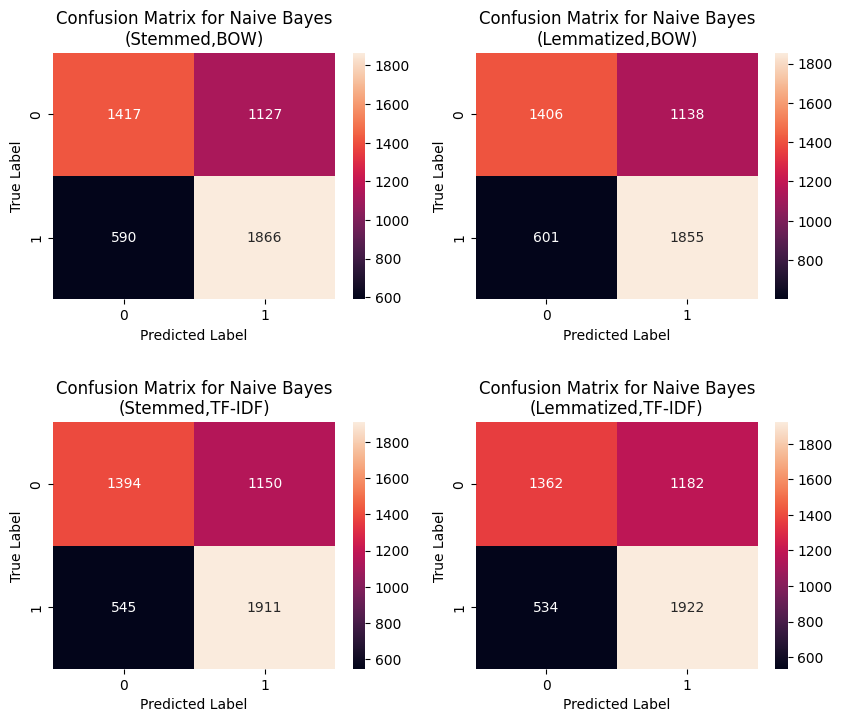

In [53]:
# Plotting Heatmap
fig, axs = plt.subplots(2, 2, figsize=(10,8))

# BOW
evaluate_model(y_test_stemmed, nb_bow_stemmed.predict(X_test_bow_stemmed), "Naive Bayes", "Stemmed", "BOW", 0, 0)
evaluate_model(y_test_lemmatized, nb_bow_lemmatized.predict(X_test_bow_lemmatized), "Naive Bayes", "Lemmatized", "BOW", 0, 1)

# TF-IDF
evaluate_model(y_test_stemmed, nb_tfidf_stemmed.predict(X_test_tfidf_stemmed), "Naive Bayes", "Stemmed", "TF-IDF", 1, 0)
evaluate_model(y_test_lemmatized, nb_tfidf_lemmatized.predict(X_test_tfidf_lemmatized), "Naive Bayes", "Lemmatized", "TF-IDF", 1, 1)

### **Support Vector Machine (SVM)**

#### **SVC**

SVM: SVC on Stemmed dataset with BOW vectorization:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      2544
           1       0.67      0.71      0.69      2456

    accuracy                           0.68      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.68      0.68      0.68      5000

SVM: SVC on Lemmatized dataset with BOW vectorization:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2544
           1       0.66      0.70      0.68      2456

    accuracy                           0.68      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.68      0.68      0.68      5000

SVM: SVC on Stemmed dataset with TF-IDF vectorization:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      2544
           1       0.71      0.75      0.73      2456

    accuracy        

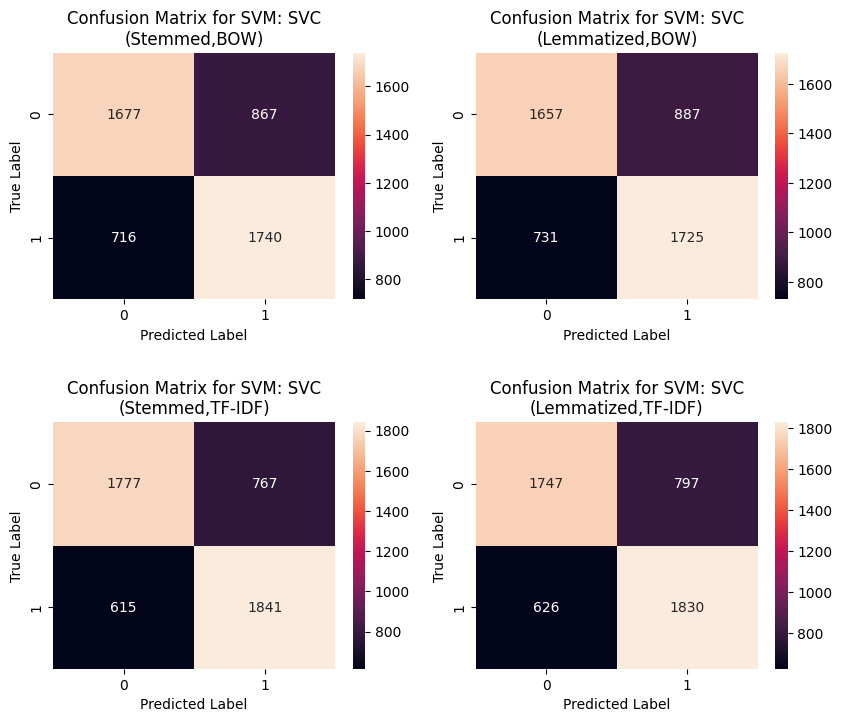

In [54]:
# Plotting Heatmap
fig, axs = plt.subplots(2, 2, figsize=(10,8))

# BOW
evaluate_model(y_test_stemmed, svm_bow_stemmed.predict(X_test_bow_stemmed), "SVM: SVC", "Stemmed", "BOW", 0, 0)
evaluate_model(y_test_lemmatized, svm_bow_lemmatized.predict(X_test_bow_lemmatized), "SVM: SVC", "Lemmatized", "BOW", 0, 1)

# TF-IDF
evaluate_model(y_test_stemmed, svm_tfidf_stemmed.predict(X_test_tfidf_stemmed), "SVM: SVC", "Stemmed", "TF-IDF", 1, 0)
evaluate_model(y_test_lemmatized, svm_tfidf_lemmatized.predict(X_test_tfidf_lemmatized), "SVM: SVC", "Lemmatized", "TF-IDF", 1, 1)

#### **LinearSVC**

SVM: LinearSVC on Stemmed dataset with BOW vectorization:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      2544
           1       0.68      0.64      0.66      2456

    accuracy                           0.68      5000
   macro avg       0.68      0.67      0.67      5000
weighted avg       0.68      0.68      0.68      5000

SVM: LinearSVC on Lemmatized dataset with BOW vectorization:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      2544
           1       0.68      0.63      0.66      2456

    accuracy                           0.68      5000
   macro avg       0.68      0.67      0.67      5000
weighted avg       0.68      0.68      0.67      5000

SVM: LinearSVC on Stemmed dataset with TF-IDF vectorization:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      2544
           1       0.67      0.69      0.68      2456

  

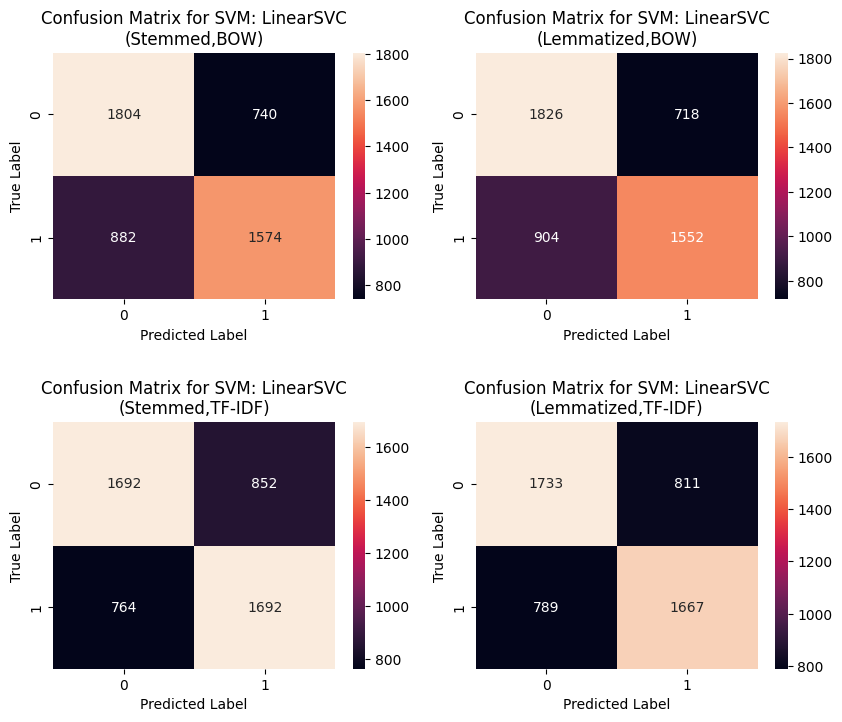

In [55]:
# Plotting Heatmap
fig, axs = plt.subplots(2, 2, figsize=(10,8))

# BOW
evaluate_model(y_test_stemmed, linear_svm_bow_stemmed.predict(X_test_bow_stemmed), "SVM: LinearSVC", "Stemmed", "BOW", 0, 0)
evaluate_model(y_test_lemmatized, linear_svm_bow_lemmatized.predict(X_test_bow_lemmatized), "SVM: LinearSVC", "Lemmatized", "BOW", 0, 1)

# TF-IDF
evaluate_model(y_test_stemmed, linear_svm_tfidf_stemmed.predict(X_test_tfidf_stemmed), "SVM: LinearSVC", "Stemmed", "TF-IDF", 1, 0)
evaluate_model(y_test_lemmatized, linear_svm_tfidf_lemmatized.predict(X_test_tfidf_lemmatized), "SVM: LinearSVC", "Lemmatized", "TF-IDF", 1, 1)

### **Random Forest Classifier**

Random Forest on Stemmed dataset with BOW vectorization:
              precision    recall  f1-score   support

           0       0.78      0.69      0.74      2544
           1       0.72      0.80      0.76      2456

    accuracy                           0.75      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.75      0.75      0.75      5000

Random Forest on Lemmatized dataset with BOW vectorization:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      2544
           1       0.71      0.81      0.76      2456

    accuracy                           0.74      5000
   macro avg       0.75      0.75      0.74      5000
weighted avg       0.75      0.74      0.74      5000

Random Forest on Stemmed dataset with TF-IDF vectorization:
              precision    recall  f1-score   support

           0       0.78      0.68      0.72      2544
           1       0.71      0.80      0.75      2456

    a

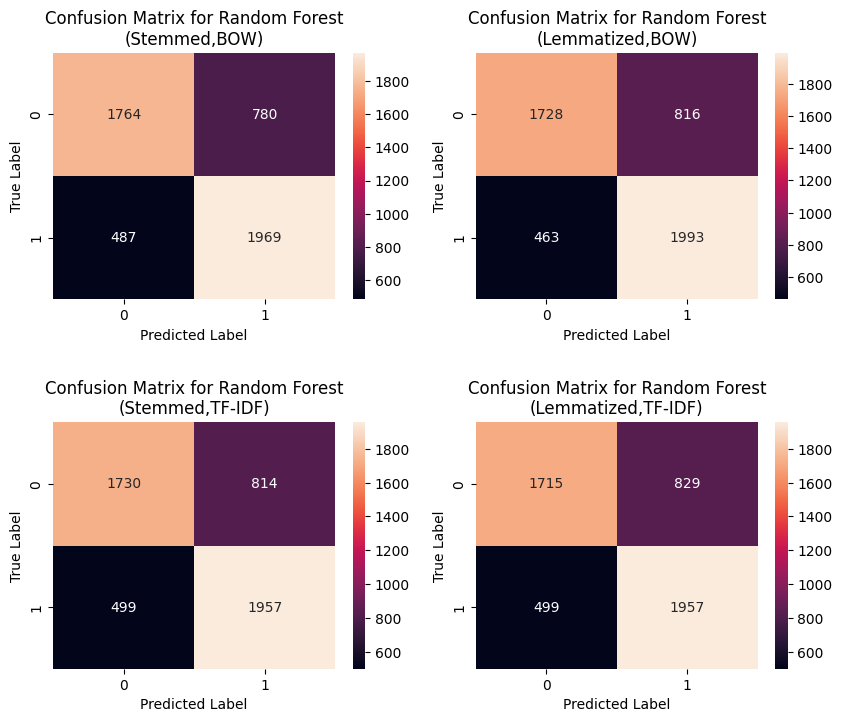

In [56]:
# Plotting Heatmap
fig, axs = plt.subplots(2, 2, figsize=(10,8))

# BOW
evaluate_model(y_test_stemmed, rf_bow_stemmed.predict(X_test_bow_stemmed), "Random Forest", "Stemmed", "BOW", 0, 0)
evaluate_model(y_test_lemmatized, rf_bow_lemmatized.predict(X_test_bow_lemmatized), "Random Forest", "Lemmatized", "BOW", 0, 1)

# TF-IDF
evaluate_model(y_test_stemmed, rf_tfidf_stemmed.predict(X_test_tfidf_stemmed), "Random Forest", "Stemmed", "TF-IDF", 1, 0)
evaluate_model(y_test_lemmatized, rf_tfidf_lemmatized.predict(X_test_tfidf_lemmatized), "Random Forest", "Lemmatized", "TF-IDF", 1, 1)

### **Logistic Regression**

Logistic Regression on Stemmed dataset with BOW vectorization:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67      2544
           1       0.66      0.67      0.66      2456

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000

Logistic Regression on Lemmatized dataset with BOW vectorization:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67      2544
           1       0.66      0.64      0.65      2456

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000

Logistic Regression on Stemmed dataset with TF-IDF vectorization:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66      2544
           1       0.65      0.68      0.6

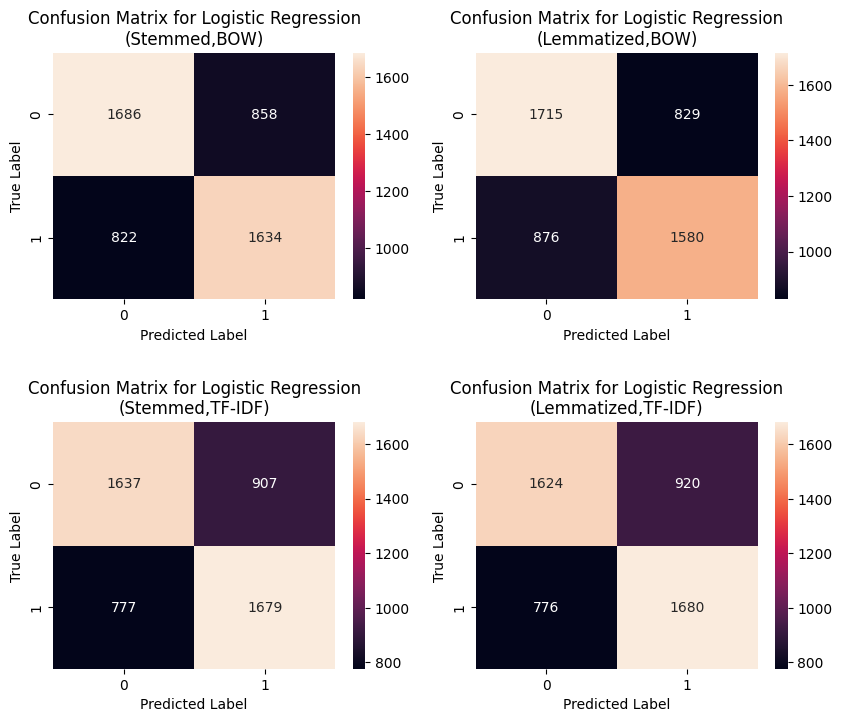

In [57]:
# Plotting Heatmap
fig, axs = plt.subplots(2, 2, figsize=(10,8))

# BOW
evaluate_model(y_test_stemmed, lr_bow_stemmed.predict(X_test_bow_stemmed), "Logistic Regression", "Stemmed", "BOW", 0, 0)
evaluate_model(y_test_lemmatized, lr_bow_lemmatized.predict(X_test_bow_lemmatized), "Logistic Regression", "Lemmatized", "BOW", 0, 1)

# TF-IDF
evaluate_model(y_test_stemmed, lr_tfidf_stemmed.predict(X_test_tfidf_stemmed), "Logistic Regression", "Stemmed", "TF-IDF", 1, 0)
evaluate_model(y_test_lemmatized, lr_tfidf_lemmatized.predict(X_test_tfidf_lemmatized), "Logistic Regression", "Lemmatized", "TF-IDF", 1, 1)

### **K-Nearest Neighbour (KNN)**

KNN on Stemmed dataset with BOW vectorization:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64      2544
           1       0.62      0.52      0.56      2456

    accuracy                           0.60      5000
   macro avg       0.61      0.60      0.60      5000
weighted avg       0.61      0.60      0.60      5000

KNN on Lemmatized dataset with BOW vectorization:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      2544
           1       0.61      0.57      0.59      2456

    accuracy                           0.61      5000
   macro avg       0.61      0.61      0.61      5000
weighted avg       0.61      0.61      0.61      5000

KNN on Stemmed dataset with TF-IDF vectorization:
              precision    recall  f1-score   support

           0       0.65      0.60      0.62      2544
           1       0.62      0.67      0.64      2456

    accuracy                       

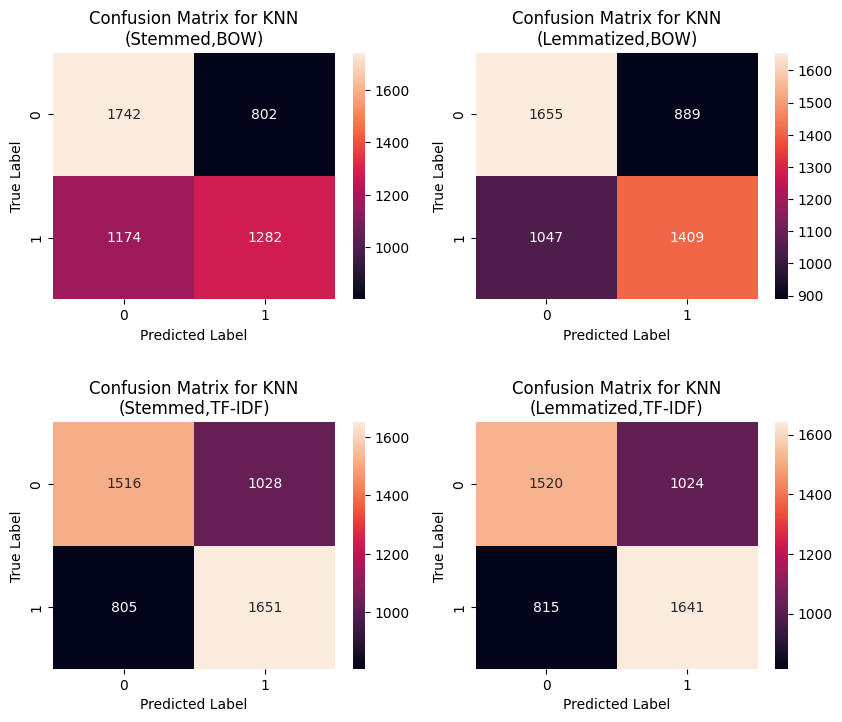

In [58]:
# Plotting Heatmap
fig, axs = plt.subplots(2, 2, figsize=(10,8))

# BOW
evaluate_model(y_test_stemmed, knn_bow_stemmed.predict(X_test_bow_stemmed), "KNN", "Stemmed", "BOW", 0, 0)
evaluate_model(y_test_lemmatized, knn_bow_lemmatized.predict(X_test_bow_lemmatized), "KNN", "Lemmatized", "BOW", 0, 1)

# TF-IDF
evaluate_model(y_test_stemmed, knn_tfidf_stemmed.predict(X_test_tfidf_stemmed), "KNN", "Stemmed", "TF-IDF", 1, 0)
evaluate_model(y_test_lemmatized, knn_tfidf_lemmatized.predict(X_test_tfidf_lemmatized), "KNN", "Lemmatized", "TF-IDF", 1, 1)

### **Decision Tree Classifier**

Decision Tree on Stemmed dataset with BOW vectorization:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      2544
           1       0.68      0.62      0.65      2456

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000

Decision Tree on Lemmatized dataset with BOW vectorization:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      2544
           1       0.67      0.62      0.64      2456

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000

Decision Tree on Stemmed dataset with TF-IDF vectorization:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      2544
           1       0.67      0.60      0.63      2456

    a

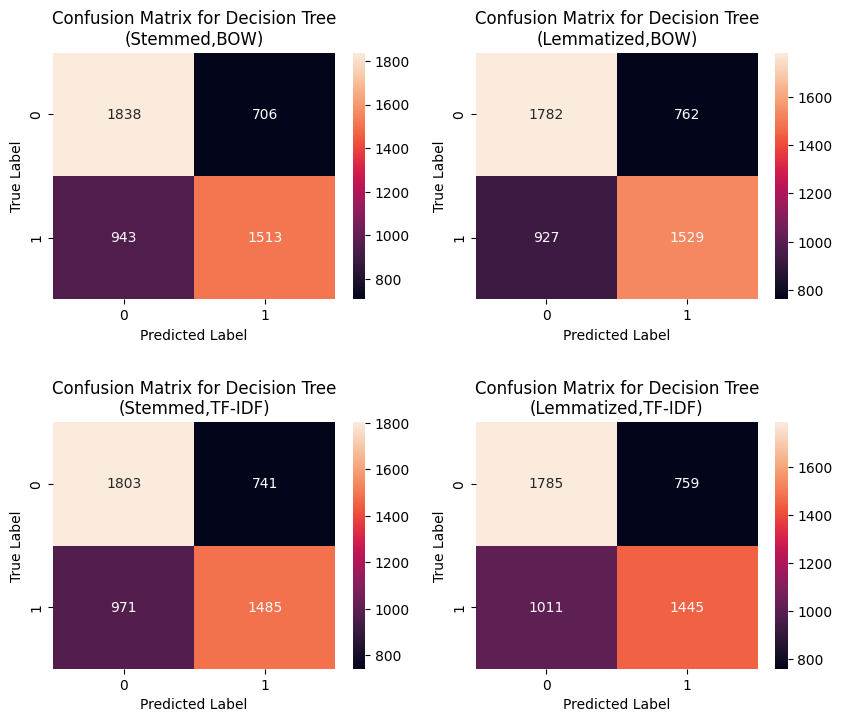

In [59]:
# Plotting Heatmap
fig, axs = plt.subplots(2, 2, figsize=(10,8))

# BOW
evaluate_model(y_test_stemmed, dt_bow_stemmed.predict(X_test_bow_stemmed), "Decision Tree", "Stemmed", "BOW", 0, 0)
evaluate_model(y_test_lemmatized, dt_bow_lemmatized.predict(X_test_bow_lemmatized), "Decision Tree", "Lemmatized", "BOW", 0, 1)

# TF-IDF
evaluate_model(y_test_stemmed, dt_tfidf_stemmed.predict(X_test_tfidf_stemmed), "Decision Tree", "Stemmed", "TF-IDF", 1, 0)
evaluate_model(y_test_lemmatized, dt_tfidf_lemmatized.predict(X_test_tfidf_lemmatized), "Decision Tree", "Lemmatized", "TF-IDF", 1, 1)

## **Analysis Of Evaluation Results**

**Based on the evaluation results, the Random Forest classifier performs the best among all the models, with the highest accuracy and F1 scores. Here is a more detailed analysis:**

- **Random Forest achieves the highest accuracy of 75% on stemmed data with BOW, compared to 60-72% for other models. It also has strong macro and weighted F1 scores of 0.75.**

- **On lemmatized data with BOW, Random Forest has 74% accuracy, again outperforming other models in the 60-72% range. The precision, recall and F1 scores are balanced for both classes.**

- **With TF-IDF vectorization, Random Forest still performs very well with 73-74% accuracy on stemmed and lemmatized data, better than the other models. The precision and recall are reasonably good for both classes.**

- **In contrast, models like Naive Bayes, SVM, Logistic Regression and KNN achieve 60-72% accuracy consistently across vectorization methods, lower than Random Forest. Their F1 scores are also not as strong except for SVM and Logistic Regression.**

- **SVM is the closest competitor to Random Forest with 68-72% accuracy. But Random Forest leverages an ensemble of trees to reduce overfitting and improve results compared to a single tree.**

- **Naive Bayes consistently scored around 66% accuracy across all configurations. The TF-IDF vectors improved the recall for the duplicate class compared to BOW. But overall, NB was outperformed by SVM and Random Forest.**

- **Logistic Regression and Decision Tree were on par with each other, with 66-67% accuracy. Nothing stood out as their strengths or weaknesses.**

- **KNN was the weakest model, with accuracy of 60-63%. It had low recall, meaning it failed to detect many of the duplicate bugs.**

- **In terms of stemming vs lemmatization, the results are quite close for Random Forest on both versions of the dataset. The stemmed version has slightly higher accuracy in some cases. But both achieve good results overall.**

- **For the other models like Naive Bayes, SVM, Logistic Regression etc, their accuracy is also very close on both stemmed and lemmatized data. There is no significant difference.**

**Concluding this, I would say that lemmatization does not really improve results over stemming for this dataset. Both versions give comparable model performance. This suggests the context needed for lemmatization does not provide much benefit here.**

### **My Final Remarks**

**Random Forest would be my choice as the best model for this dataset based on its high accuracy, good F1 score, balance between precision and recall, and robust performance across vectorization methods. I think that some hyperparameter tuning may further improve its effectiveness.**